# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

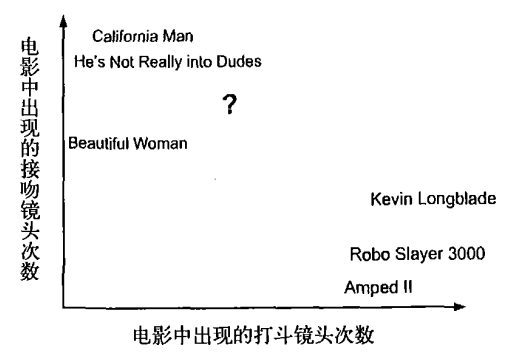

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

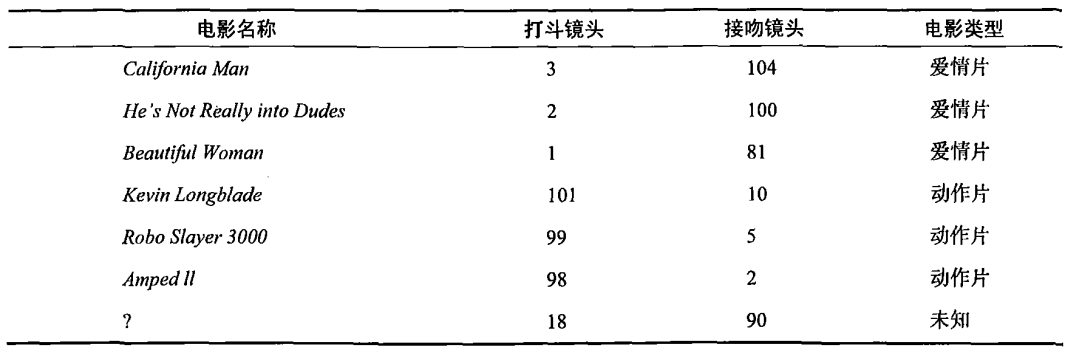

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

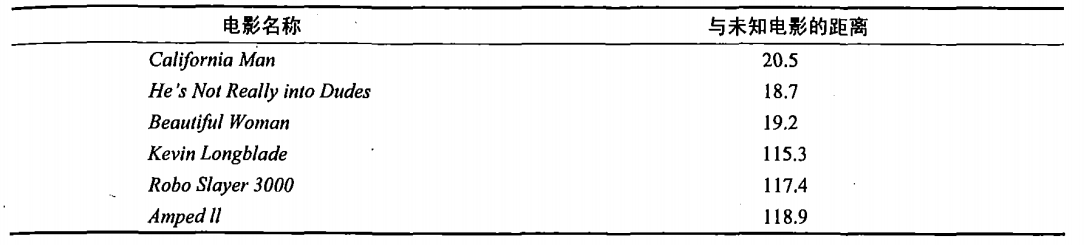

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movie = pd.read_excel('../tests.xlsx', sheet_name=1)
movie

电影名称  武打镜头  接吻镜头 分类情况
0   大话西游    36     1  动作片
1    杀破狼    43     2  动作片
2    前任3     0    10  爱情片
3    战狼2    59     1  动作片
4  泰坦尼克号     1    15  爱情片
5   星语心愿     2    19  爱情片

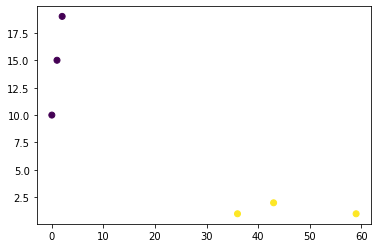

In [14]:
plt.scatter(movie['武打镜头'], movie['接吻镜头'], c=[1,1,0,1,0,0])

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn = KNeighborsClassifier()
# 训练数据是样本,一定得是二维的(样本个数,每个样本多个特征).必须是数字
knn.fit(movie[['武打镜头', '接吻镜头']], movie['分类情况'] )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
X_test = np.array([[30,2],[45,3],[3,15]])
y_ = knn.predict(X_test)
y_

array(['动作片', '动作片', '爱情片'], dtype=object)

In [22]:
# 准确率 score
knn.score(movie[['武打镜头', '接吻镜头']], movie['分类情况']) # 训练时准确率

1.0

In [23]:
knn.score(X_test,['动作片', '动作片', '爱情片'])  # 预测时准确率

1.0

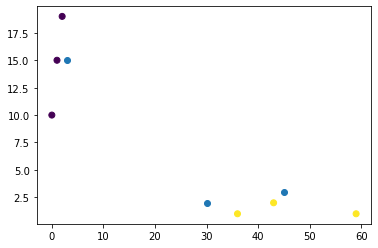

In [25]:
plt.scatter(movie['武打镜头'], movie['接吻镜头'], c=[1,1,0,1,0,0])
plt.scatter(X_test[:,0],X_test[:,1])

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

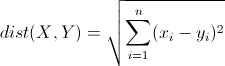

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

In [26]:
X_train = np.array([[180, 170, 43], [170, 100, 38], [174, 120, 42], [173, 160, 43], [165, 200, 42], [165, 120, 37], [155, 90, 36], [190, 180, 46], [160, 100, 38], [160, 120, 40]])
y_train = np.array(['男', '女 ', '男', '男', '男', '女', '女', '男', '女', '男'])

In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
X_test = np.array([[175, 150, 43], [170, 140, 42], [158, 100, 37], [165, 80, 36], [180, 200, 43]])
y_test = knn.predict(X_test)
y_test

array(['男', '男', '女', '女', '男'], dtype='<U2')

In [34]:
knn.score(X_train, y_train)

0.7

In [35]:
knn.score(X_test,y_test)

1.0

In [37]:
knn.predict(X_train)  # 预测结果

array(['男', '女', '女', '男', '男', '女', '女', '男', '女', '女'], dtype='<U2')

### 1）用于分类

导包，机器学习的算法KNN、数据鸢尾花


In [38]:
from sklearn.datasets import load_iris

获取训练样本

绘制图形

定义KNN分类器

第一步，训练数据

第二步预测数据：，所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

对数据进行预测

显示数据

In [39]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [40]:
data = iris['data']    # 数据
target = iris['target']  # 分类

In [41]:
data.shape

(150, 4)

In [225]:
# 切割数据
from sklearn.model_selection import train_test_split

In [226]:
X_train,X_test,y_train,y_test = train_test_split(data, target, test_size=0.2) # 随机取的, 取20%作为测试数据(或直接取整数个)

In [227]:
X_train.shape

(168, 2)

In [228]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [229]:
y_ = knn.predict(X_test)
y_

array([1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 0,
       1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0],
      dtype=int64)

In [230]:
knn.score(X_train,y_train)

0.9523809523809523

In [231]:
knn.score(X_test,y_test)

0.9761904761904762

In [232]:
knn.score(X_test,y_)

1.0

In [61]:
# 从data中选取两个特征.
df = DataFrame(data=data)
df

0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
5    5.4  3.9  1.7  0.4
6    4.6  3.4  1.4  0.3
7    5.0  3.4  1.5  0.2
8    4.4  2.9  1.4  0.2
9    4.9  3.1  1.5  0.1
10   5.4  3.7  1.5  0.2
11   4.8  3.4  1.6  0.2
12   4.8  3.0  1.4  0.1
13   4.3  3.0  1.1  0.1
14   5.8  4.0  1.2  0.2
15   5.7  4.4  1.5  0.4
16   5.4  3.9  1.3  0.4
17   5.1  3.5  1.4  0.3
18   5.7  3.8  1.7  0.3
19   5.1  3.8  1.5  0.3
20   5.4  3.4  1.7  0.2
21   5.1  3.7  1.5  0.4
22   4.6  3.6  1.0  0.2
23   5.1  3.3  1.7  0.5
24   4.8  3.4  1.9  0.2
25   5.0  3.0  1.6  0.2
26   5.0  3.4  1.6  0.4
27   5.2  3.5  1.5  0.2
28   5.2  3.4  1.4  0.2
29   4.7  3.2  1.6  0.2
..   ...  ...  ...  ...
120  6.9  3.2  5.7  2.3
121  5.6  2.8  4.9  2.0
122  7.7  2.8  6.7  2.0
123  6.3  2.7  4.9  1.8
124  6.7  3.3  5.7  2.1
125  7.2  3.2  6.0  1.8
126  6.2  2.8  4.8  1.8
127  6.1  3.0  4.9  1.8
128  6.4  2.8  5.6  2.1
129  7.2  3.0  5.8  1.6
130  7.4  2.8  6.1  1.9
131  7.9  3.8  6.4  2.0
132  6.4  2.8  5.6  2.2
133  6.3  2.8  5.1  1.5
134  6.1  2.6  5.6  1.4
135  7.7  3.0  6.1  2.3
136  6.3  3.4  5.6  2.4
137  6.4  3.1  5.5  1.8
138  6.0  3.0  4.8  1.8
139  6.9  3.1  5.4  2.1
140  6.7  3.1  5.6  2.4
141  6.9  3.1  5.1  2.3
142  5.8  2.7  5.1  1.9
143  6.8  3.2  5.9  2.3
144  6.7  3.3  5.7  2.5
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]

In [62]:
data = data[:,0:2]
data.shape

(150, 2)

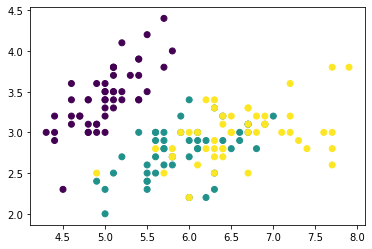

In [63]:
plt.scatter(data[:,0],data[:,1],c=target) 

In [64]:
knn = KNeighborsClassifier()
knn.fit(data, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
knn.score(data, target)

0.8333333333333334

In [70]:
# 在最小值和最大值范围之间, 生成平面上的点来做预测数据.
xmin, xmax = data[:,0].min(), data[:,0].max()
ymin, ymax = data[:, 1].min(), data[:,1].max()
x,y = np.linspace(xmin, xmax, 1000), np.linspace(ymin, ymax, 1000)

In [71]:
# 范围变成面
X,Y = np.meshgrid(x,y)

X_test = np.c_[X.ravel(),Y.ravel()]   # 取范围中的点, 生成预测数据
X_test


array([[4.3       , 2.        ],
       [4.3036036 , 2.        ],
       [4.30720721, 2.        ],
       ...,
       [7.89279279, 4.4       ],
       [7.8963964 , 4.4       ],
       [7.9       , 4.4       ]])

In [72]:
X_test.shape

(1000000, 2)

In [73]:
y_ = knn.predict(X_test)

In [74]:
y_[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

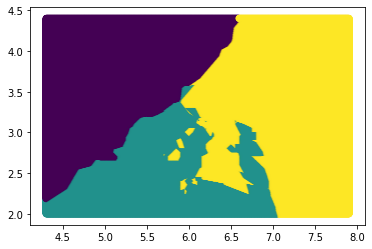

In [79]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_)  

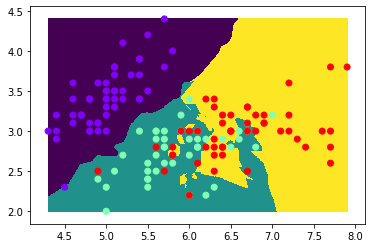

In [84]:
plt.pcolormesh(X,Y,y_.reshape((1000,1000)))  # 点,颜色都必须是二维的
plt.scatter(data[:,0],data[:,1],c=target, cmap='rainbow')

### 2）用于回归  
回归用于对趋势的预测

导包

生成样本数据

生成测试数据的结果

第一步：生成模型，并训练数据

第二步：使用模型，预测数据

绘图显示数据

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

获取数据

绘制

## 3、作业

#### 1、预测年收入是否大于50K美元

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

数据转换，将String类型数据转换为int

【知识点】map方法，进行数据转换

切片：训练数据和预测数据

生成算法

第一步：训练数据

第二步：预测数据

保存训练模型  
from sklearn.externals import joblib

#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

In [99]:
seed = pd.read_csv('../data/seeds.tsv',sep=('\t'),header=None)
seed

0      1       2      3      4       5      6         7
0    15.26  14.84  0.8710  5.763  3.312  2.2210  5.220      Kama
1    14.88  14.57  0.8811  5.554  3.333  1.0180  4.956      Kama
2    14.29  14.09  0.9050  5.291  3.337  2.6990  4.825      Kama
3    13.84  13.94  0.8955  5.324  3.379  2.2590  4.805      Kama
4    16.14  14.99  0.9034  5.658  3.562  1.3550  5.175      Kama
5    14.38  14.21  0.8951  5.386  3.312  2.4620  4.956      Kama
6    14.69  14.49  0.8799  5.563  3.259  3.5860  5.219      Kama
7    14.11  14.10  0.8911  5.420  3.302  2.7000  5.000      Kama
8    16.63  15.46  0.8747  6.053  3.465  2.0400  5.877      Kama
9    16.44  15.25  0.8880  5.884  3.505  1.9690  5.533      Kama
10   15.26  14.85  0.8696  5.714  3.242  4.5430  5.314      Kama
11   14.03  14.16  0.8796  5.438  3.201  1.7170  5.001      Kama
12   13.89  14.02  0.8880  5.439  3.199  3.9860  4.738      Kama
13   13.78  14.06  0.8759  5.479  3.156  3.1360  4.872      Kama
14   13.74  14.05  0.8744  5.482  3.114  2.9320  4.825      Kama
15   14.59  14.28  0.8993  5.351  3.333  4.1850  4.781      Kama
16   13.99  13.83  0.9183  5.119  3.383  5.2340  4.781      Kama
17   15.69  14.75  0.9058  5.527  3.514  1.5990  5.046      Kama
18   14.70  14.21  0.9153  5.205  3.466  1.7670  4.649      Kama
19   12.72  13.57  0.8686  5.226  3.049  4.1020  4.914      Kama
20   14.16  14.40  0.8584  5.658  3.129  3.0720  5.176      Kama
21   14.11  14.26  0.8722  5.520  3.168  2.6880  5.219      Kama
22   15.88  14.90  0.8988  5.618  3.507  0.7651  5.091      Kama
23   12.08  13.23  0.8664  5.099  2.936  1.4150  4.961      Kama
24   15.01  14.76  0.8657  5.789  3.245  1.7910  5.001      Kama
25   16.19  15.16  0.8849  5.833  3.421  0.9030  5.307      Kama
26   13.02  13.76  0.8641  5.395  3.026  3.3730  4.825      Kama
27   12.74  13.67  0.8564  5.395  2.956  2.5040  4.869      Kama
28   14.11  14.18  0.8820  5.541  3.221  2.7540  5.038      Kama
29   13.45  14.02  0.8604  5.516  3.065  3.5310  5.097      Kama
..     ...    ...     ...    ...    ...     ...    ...       ...
180  11.41  12.95  0.8560  5.090  2.775  4.9570  4.825  Canadian
181  12.46  13.41  0.8706  5.236  3.017  4.9870  5.147  Canadian
182  12.19  13.36  0.8579  5.240  2.909  4.8570  5.158  Canadian
183  11.65  13.07  0.8575  5.108  2.850  5.2090  5.135  Canadian
184  12.89  13.77  0.8541  5.495  3.026  6.1850  5.316  Canadian
185  11.56  13.31  0.8198  5.363  2.683  4.0620  5.182  Canadian
186  11.81  13.45  0.8198  5.413  2.716  4.8980  5.352  Canadian
187  10.91  12.80  0.8372  5.088  2.675  4.1790  4.956  Canadian
188  11.23  12.82  0.8594  5.089  2.821  7.5240  4.957  Canadian
189  10.59  12.41  0.8648  4.899  2.787  4.9750  4.794  Canadian
190  10.93  12.80  0.8390  5.046  2.717  5.3980  5.045  Canadian
191  11.27  12.86  0.8563  5.091  2.804  3.9850  5.001  Canadian
192  11.87  13.02  0.8795  5.132  2.953  3.5970  5.132  Canadian
193  10.82  12.83  0.8256  5.180  2.630  4.8530  5.089  Canadian
194  12.11  13.27  0.8639  5.236  2.975  4.1320  5.012  Canadian
195  12.80  13.47  0.8860  5.160  3.126  4.8730  4.914  Canadian
196  12.79  13.53  0.8786  5.224  3.054  5.4830  4.958  Canadian
197  13.37  13.78  0.8849  5.320  3.128  4.6700  5.091  Canadian
198  12.62  13.67  0.8481  5.410  2.911  3.3060  5.231  Canadian
199  12.76  13.38  0.8964  5.073  3.155  2.8280  4.830  Canadian
200  12.38  13.44  0.8609  5.219  2.989  5.4720  5.045  Canadian
201  12.67  13.32  0.8977  4.984  3.135  2.3000  4.745  Canadian
202  11.18  12.72  0.8680  5.009  2.810  4.0510  4.828  Canadian
203  12.70  13.41  0.8874  5.183  3.091  8.4560  5.000  Canadian
204  12.37  13.47  0.8567  5.204  2.960  3.9190  5.001  Canadian
205  12.19  13.20  0.8783  5.137  2.981  3.6310  4.870  Canadian
206  11.23  12.88  0.8511  5.140  2.795  4.3250  5.003  Canadian
207  13.20  13.66  0.8883  5.236  3.232  8.3150  5.056  Canadian
208  11.84  13.21  0.8521  5.175  2.836  3.5980  5.044  Canadian
209  12.30  13.34  0.8684  5.243  2.974  5.6

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [120]:
# 随机切割原数据中20%作为预测数据
X_train,X_test,y_train,y_test = train_test_split(seed.loc[:,:6],seed[7],test_size=0.2)

In [122]:
X_test.shape

(42, 7)

In [123]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
# seed[7]
# seed.loc[:,:'6']

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [138]:
y_ = knn.predict(X_test)
y_

array(['Canadian', 'Canadian', 'Rosa', 'Kama', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Kama', 'Canadian', 'Kama', 'Canadian', 'Canadian',
       'Canadian', 'Kama', 'Kama', 'Canadian', 'Canadian', 'Rosa',
       'Canadian', 'Canadian', 'Kama', 'Canadian', 'Kama', 'Kama',
       'Canadian', 'Rosa', 'Kama', 'Kama', 'Canadian', 'Kama', 'Kama',
       'Canadian', 'Rosa', 'Kama', 'Rosa', 'Rosa', 'Canadian', 'Canadian',
       'Kama', 'Kama'], dtype=object)

In [144]:
y_test

146    Canadian
177    Canadian
73         Rosa
179    Canadian
128        Rosa
106        Rosa
37         Kama
139        Rosa
51         Kama
6          Kama
150    Canadian
0          Kama
167    Canadian
174    Canadian
143    Canadian
23         Kama
63         Kama
62         Kama
164    Canadian
81         Rosa
152    Canadian
60         Kama
2          Kama
149    Canadian
124        Rosa
35         Kama
26         Kama
10         Kama
58         Kama
8          Kama
193    Canadian
57         Kama
67         Kama
209    Canadian
118        Rosa
30         Kama
98         Rosa
123        Rosa
172    Canadian
157    Canadian
64         Kama
48         Kama
Name: 7, dtype: object

In [141]:
knn.score(X_test,y_test)

0.8095238095238095

In [143]:
knn.score(X_train,y_train)

0.9285714285714286

0.8095238095238095

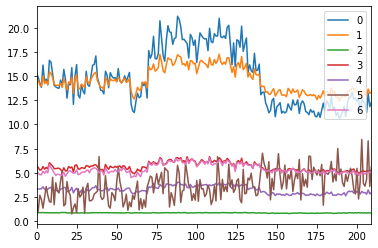

In [182]:
all_data = seed.loc[:,:6]  # 所有训练数据
all_data.plot()

In [197]:
target = seed[7]        # 品种
# 从所有数据中选两个特征
data = all_data[[3,6]]  # 数据
data

3      6
0    5.763  5.220
1    5.554  4.956
2    5.291  4.825
3    5.324  4.805
4    5.658  5.175
5    5.386  4.956
6    5.563  5.219
7    5.420  5.000
8    6.053  5.877
9    5.884  5.533
10   5.714  5.314
11   5.438  5.001
12   5.439  4.738
13   5.479  4.872
14   5.482  4.825
15   5.351  4.781
16   5.119  4.781
17   5.527  5.046
18   5.205  4.649
19   5.226  4.914
20   5.658  5.176
21   5.520  5.219
22   5.618  5.091
23   5.099  4.961
24   5.789  5.001
25   5.833  5.307
26   5.395  4.825
27   5.395  4.869
28   5.541  5.038
29   5.516  5.097
..     ...    ...
180  5.090  4.825
181  5.236  5.147
182  5.240  5.158
183  5.108  5.135
184  5.495  5.316
185  5.363  5.182
186  5.413  5.352
187  5.088  4.956
188  5.089  4.957
189  4.899  4.794
190  5.046  5.045
191  5.091  5.001
192  5.132  5.132
193  5.180  5.089
194  5.236  5.012
195  5.160  4.914
196  5.224  4.958
197  5.320  5.091
198  5.410  5.231
199  5.073  4.830
200  5.219  5.045
201  4.984  4.745
202  5.009  4.828
203  5.183  5.000
204  5.204  5.001
205  5.137  4.870
206  5.140  5.003
207  5.236  5.056
208  5.175  5.044
209  5.243  5.063

[210 rows x 2 columns]

In [191]:
target.unique()

array(['Kama', 'Rosa', 'Canadian'], dtype=object)

In [214]:
# 给品种分配颜色
seed[8] = seed[7].map({'Kama':0,"Rosa":1,'Canadian':2})
seed

0      1       2      3      4       5      6         7  8
0    15.26  14.84  0.8710  5.763  3.312  2.2210  5.220      Kama  0
1    14.88  14.57  0.8811  5.554  3.333  1.0180  4.956      Kama  0
2    14.29  14.09  0.9050  5.291  3.337  2.6990  4.825      Kama  0
3    13.84  13.94  0.8955  5.324  3.379  2.2590  4.805      Kama  0
4    16.14  14.99  0.9034  5.658  3.562  1.3550  5.175      Kama  0
5    14.38  14.21  0.8951  5.386  3.312  2.4620  4.956      Kama  0
6    14.69  14.49  0.8799  5.563  3.259  3.5860  5.219      Kama  0
7    14.11  14.10  0.8911  5.420  3.302  2.7000  5.000      Kama  0
8    16.63  15.46  0.8747  6.053  3.465  2.0400  5.877      Kama  0
9    16.44  15.25  0.8880  5.884  3.505  1.9690  5.533      Kama  0
10   15.26  14.85  0.8696  5.714  3.242  4.5430  5.314      Kama  0
11   14.03  14.16  0.8796  5.438  3.201  1.7170  5.001      Kama  0
12   13.89  14.02  0.8880  5.439  3.199  3.9860  4.738      Kama  0
13   13.78  14.06  0.8759  5.479  3.156  3.1360  4.872      Kama  0
14   13.74  14.05  0.8744  5.482  3.114  2.9320  4.825      Kama  0
15   14.59  14.28  0.8993  5.351  3.333  4.1850  4.781      Kama  0
16   13.99  13.83  0.9183  5.119  3.383  5.2340  4.781      Kama  0
17   15.69  14.75  0.9058  5.527  3.514  1.5990  5.046      Kama  0
18   14.70  14.21  0.9153  5.205  3.466  1.7670  4.649      Kama  0
19   12.72  13.57  0.8686  5.226  3.049  4.1020  4.914      Kama  0
20   14.16  14.40  0.8584  5.658  3.129  3.0720  5.176      Kama  0
21   14.11  14.26  0.8722  5.520  3.168  2.6880  5.219      Kama  0
22   15.88  14.90  0.8988  5.618  3.507  0.7651  5.091      Kama  0
23   12.08  13.23  0.8664  5.099  2.936  1.4150  4.961      Kama  0
24   15.01  14.76  0.8657  5.789  3.245  1.7910  5.001      Kama  0
25   16.19  15.16  0.8849  5.833  3.421  0.9030  5.307      Kama  0
26   13.02  13.76  0.8641  5.395  3.026  3.3730  4.825      Kama  0
27   12.74  13.67  0.8564  5.395  2.956  2.5040  4.869      Kama  0
28   14.11  14.18  0.8820  5.541  3.221  2.7540  5.038      Kama  0
29   13.45  14.02  0.8604  5.516  3.065  3.5310  5.097      Kama  0
..     ...    ...     ...    ...    ...     ...    ...       ... ..
180  11.41  12.95  0.8560  5.090  2.775  4.9570  4.825  Canadian  2
181  12.46  13.41  0.8706  5.236  3.017  4.9870  5.147  Canadian  2
182  12.19  13.36  0.8579  5.240  2.909  4.8570  5.158  Canadian  2
183  11.65  13.07  0.8575  5.108  2.850  5.2090  5.135  Canadian  2
184  12.89  13.77  0.8541  5.495  3.026  6.1850  5.316  Canadian  2
185  11.56  13.31  0.8198  5.363  2.683  4.0620  5.182  Canadian  2
186  11.81  13.45  0.8198  5.413  2.716  4.8980  5.352  Canadian  2
187  10.91  12.80  0.8372  5.088  2.675  4.1790  4.956  Canadian  2
188  11.23  12.82  0.8594  5.089  2.821  7.5240  4.957  Canadian  2
189  10.59  12.41  0.8648  4.899  2.787  4.9750  4.794  Canadian  2
190  10.93  12.80  0.8390  5.046  2.717  5.3980  5.045  Canadian  2
191  11.27  12.86  0.8563  5.091  2.804  3.9850  5.001  Canadian  2
192  11.87  13.02  0.8795  5.132  2.953  3.5970  5.132  Canadian  2
193  10.82  12.83  0.8256  5.180  2.630  4.8530  5.089  Canadian  2
194  12.11  13.27  0.8639  5.236  2.975  4.1320  5.012  Canadian  2
195  12.80  13.47  0.8860  5.160  3.126  4.8730  4.914  Canadian  2
196  12.79  13.53  0.8786  5.224  3.054  5.4830  4.958  Canadian  2
197  13.37  13.78  0.8849  5.320  3.128  4.6700  5.091  Canadian  2
198  12.62  13.67  0.8481  5.410  2.911  3.3060  5.231  Canadian  2
199  12.76  13.38  0.8964  5.073  3.155  2.8280  4.830  Canadian  2
200  12.38  13.44  0.8609  5.219  2.989  5.4720  5.045  Canadian  2
201  12.67  13.32  0.8977  4.984  3.135  2.3000  4.745  Canadian  2
202  11.18  12.72  0.8680  5.009  2.810  4.0510  4.828  Canadian  2
203  12.70  13.41  0.8874  5.183  3.091  8.4560  5.000  Canadian  2
204  12.37  13.47  0.8567  5.204  2.960  3.9190  5.001  Canadian  2
205  12.19  13.20  0.8783  5.137  2.981  3.6310  4.870  Canadian  2
206  11.23  12.88  0.8511  5.140  2.795  4.3250  5.003  Canadian 

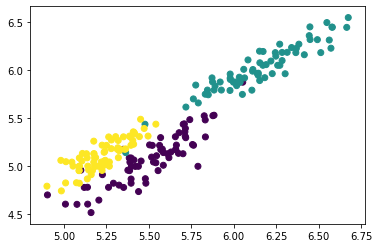

In [193]:
plt.scatter(data.loc[:,3],data.loc[:,6],c=seed[8])

In [215]:
knn = KNeighborsClassifier()
knn.fit(data,seed[8])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [216]:
knn.score(data,target)

0.9523809523809523

In [217]:
# 生成平面上的点来做预测数据.
xmin, xmax = data.loc[:,3].min(), data.loc[:,3].max()
ymin, ymax = data.loc[:,6].min(), data.loc[:,6].max()
x = np.linspace(xmin,xmax,1000)
y = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(x,y)               # 生成网格
# display(X,Y)
X_test = np.c_[X.ravel(),Y.ravel()]  # 生成点
X_test

array([[4.899     , 4.519     ],
       [4.90077778, 4.519     ],
       [4.90255556, 4.519     ],
       ...,
       [6.67144444, 6.55      ],
       [6.67322222, 6.55      ],
       [6.675     , 6.55      ]])

In [218]:
X_test.shape

(1000000, 2)

In [219]:
y_ = knn.predict(X_test)
y_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not ['Kama' 'Kama' 'Kama' ... 'Rosa' 'Rosa' 'Rosa'].

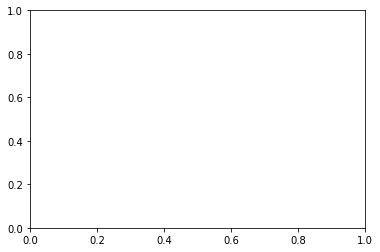

In [212]:
# plt.scatter(X_test[:,0],  X_test[:,1], c=y_)

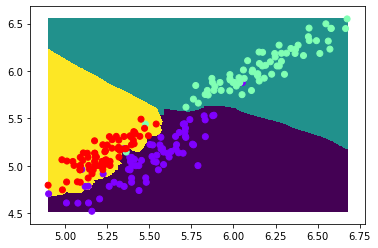

In [222]:
plt.pcolormesh(X, Y , y_.reshape((1000,1000)))
plt.scatter(data.loc[:,3],data.loc[:,6],c=seed[8], cmap='rainbow')

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度

In [233]:
dating = pd.read_csv('../data/datingTestSet.txt',sep=('\t'),header=None)
dating

0          1         2           3
0    40920   8.326976  0.953952  largeDoses
1    14488   7.153469  1.673904  smallDoses
2    26052   1.441871  0.805124   didntLike
3    75136  13.147394  0.428964   didntLike
4    38344   1.669788  0.134296   didntLike
5    72993  10.141740  1.032955   didntLike
6    35948   6.830792  1.213192  largeDoses
7    42666  13.276369  0.543880  largeDoses
8    67497   8.631577  0.749278   didntLike
9    35483  12.273169  1.508053  largeDoses
10   50242   3.723498  0.831917   didntLike
11   63275   8.385879  1.669485   didntLike
12    5569   4.875435  0.728658  smallDoses
13   51052   4.680098  0.625224   didntLike
14   77372  15.299570  0.331351   didntLike
15   43673   1.889461  0.191283   didntLike
16   61364   7.516754  1.269164   didntLike
17   69673  14.239195  0.261333   didntLike
18   15669   0.000000  1.250185  smallDoses
19   28488  10.528555  1.304844  largeDoses
20    6487   3.540265  0.822483  smallDoses
21   37708   2.991551  0.833920   didntLike
22   22620   5.297865  0.638306  smallDoses
23   28782   6.593803  0.187108  largeDoses
24   19739   2.816760  1.686209  smallDoses
25   36788  12.458258  0.649617  largeDoses
26    5741   0.000000  1.656418  smallDoses
27   28567   9.968648  0.731232  largeDoses
28    6808   1.364838  0.640103  smallDoses
29   41611   0.230453  1.151996   didntLike
..     ...        ...       ...         ...
970  53711  12.149747  1.389088  largeDoses
971  64371   9.149678  0.874905   didntLike
972   9289   9.666576  1.370330  smallDoses
973  60613   3.620110  0.287767   didntLike
974  18338   5.238800  1.253646  smallDoses
975  22845  14.715782  1.503758  largeDoses
976  74676  14.445740  1.211160   didntLike
977  34143  13.609528  0.364240  largeDoses
978  14153   3.141585  0.424280  smallDoses
979   9327   0.000000  0.120947  smallDoses
980  18991   0.454750  1.033280  smallDoses
981   9193   0.510310  0.016395  smallDoses
982   2285   3.864171  0.616349  smallDoses
983   9493   6.724021  0.563044  smallDoses
984   2371   4.289375  0.012563  smallDoses
985  13963   0.000000  1.437030  smallDoses
986   2299   3.733617  0.698269  smallDoses
987   5262   2.002589  1.380184  smallDoses
988   4659   2.502627  0.184223  smallDoses
989  17582   6.382129  0.876581  smallDoses
990  27750   8.546741  0.128706  largeDoses
991   9868   2.694977  0.432818  smallDoses
992  18333   3.951256  0.333300  smallDoses
993   3780   9.856183  0.329181  smallDoses
994  18190   2.068962  0.429927  smallDoses
995  11145   3.410627  0.631838  smallDoses
996  68846   9.974715  0.669787   didntLike
997  26575  10.650102  0.866627  largeDoses
998  48111   9.134528  0.728045  largeDoses
999  43757   7.882601  1.332446  largeDoses

[1000 rows x 4 columns]

In [235]:
dating[3].unique()

array(['largeDoses', 'smallDoses', 'didntLike'], dtype=object)

In [244]:
dating[4] = dating[3].map({'largeDoses':0,"smallDoses":1,'didntLike':2})
target = dating[4]
target.shape

(1000,)

In [248]:
all_data = dating.loc[:,:2]
all_data
# all_data.shape

0          1         2
0    40920   8.326976  0.953952
1    14488   7.153469  1.673904
2    26052   1.441871  0.805124
3    75136  13.147394  0.428964
4    38344   1.669788  0.134296
5    72993  10.141740  1.032955
6    35948   6.830792  1.213192
7    42666  13.276369  0.543880
8    67497   8.631577  0.749278
9    35483  12.273169  1.508053
10   50242   3.723498  0.831917
11   63275   8.385879  1.669485
12    5569   4.875435  0.728658
13   51052   4.680098  0.625224
14   77372  15.299570  0.331351
15   43673   1.889461  0.191283
16   61364   7.516754  1.269164
17   69673  14.239195  0.261333
18   15669   0.000000  1.250185
19   28488  10.528555  1.304844
20    6487   3.540265  0.822483
21   37708   2.991551  0.833920
22   22620   5.297865  0.638306
23   28782   6.593803  0.187108
24   19739   2.816760  1.686209
25   36788  12.458258  0.649617
26    5741   0.000000  1.656418
27   28567   9.968648  0.731232
28    6808   1.364838  0.640103
29   41611   0.230453  1.151996
..     ...        ...       ...
970  53711  12.149747  1.389088
971  64371   9.149678  0.874905
972   9289   9.666576  1.370330
973  60613   3.620110  0.287767
974  18338   5.238800  1.253646
975  22845  14.715782  1.503758
976  74676  14.445740  1.211160
977  34143  13.609528  0.364240
978  14153   3.141585  0.424280
979   9327   0.000000  0.120947
980  18991   0.454750  1.033280
981   9193   0.510310  0.016395
982   2285   3.864171  0.616349
983   9493   6.724021  0.563044
984   2371   4.289375  0.012563
985  13963   0.000000  1.437030
986   2299   3.733617  0.698269
987   5262   2.002589  1.380184
988   4659   2.502627  0.184223
989  17582   6.382129  0.876581
990  27750   8.546741  0.128706
991   9868   2.694977  0.432818
992  18333   3.951256  0.333300
993   3780   9.856183  0.329181
994  18190   2.068962  0.429927
995  11145   3.410627  0.631838
996  68846   9.974715  0.669787
997  26575  10.650102  0.866627
998  48111   9.134528  0.728045
999  43757   7.882601  1.332446

[1000 rows x 3 columns]

In [253]:
X_train,X_test,y_train,y_test = train_test_split(all_data,target,test_size=0.2)
display(X_train.shape,y_train.shape)

(800, 3)

(800,)

In [254]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [259]:
y_ = knn.predict(X_test)
y_

array([1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2,
       1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 1, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 0,
       2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 0, 1,
       0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2,
       0, 0], dtype=int64)

In [256]:
knn.score(X_train,y_train)

0.8625

In [257]:
knn.score(X_test,y_test)

0.785

In [260]:
knn.score(X_test,y_)

1.0

自己创造数据

In [266]:
# 从al_data中选取两个特征
df = DataFrame(data=all_data)
df

0          1         2
0    40920   8.326976  0.953952
1    14488   7.153469  1.673904
2    26052   1.441871  0.805124
3    75136  13.147394  0.428964
4    38344   1.669788  0.134296
5    72993  10.141740  1.032955
6    35948   6.830792  1.213192
7    42666  13.276369  0.543880
8    67497   8.631577  0.749278
9    35483  12.273169  1.508053
10   50242   3.723498  0.831917
11   63275   8.385879  1.669485
12    5569   4.875435  0.728658
13   51052   4.680098  0.625224
14   77372  15.299570  0.331351
15   43673   1.889461  0.191283
16   61364   7.516754  1.269164
17   69673  14.239195  0.261333
18   15669   0.000000  1.250185
19   28488  10.528555  1.304844
20    6487   3.540265  0.822483
21   37708   2.991551  0.833920
22   22620   5.297865  0.638306
23   28782   6.593803  0.187108
24   19739   2.816760  1.686209
25   36788  12.458258  0.649617
26    5741   0.000000  1.656418
27   28567   9.968648  0.731232
28    6808   1.364838  0.640103
29   41611   0.230453  1.151996
..     ...        ...       ...
970  53711  12.149747  1.389088
971  64371   9.149678  0.874905
972   9289   9.666576  1.370330
973  60613   3.620110  0.287767
974  18338   5.238800  1.253646
975  22845  14.715782  1.503758
976  74676  14.445740  1.211160
977  34143  13.609528  0.364240
978  14153   3.141585  0.424280
979   9327   0.000000  0.120947
980  18991   0.454750  1.033280
981   9193   0.510310  0.016395
982   2285   3.864171  0.616349
983   9493   6.724021  0.563044
984   2371   4.289375  0.012563
985  13963   0.000000  1.437030
986   2299   3.733617  0.698269
987   5262   2.002589  1.380184
988   4659   2.502627  0.184223
989  17582   6.382129  0.876581
990  27750   8.546741  0.128706
991   9868   2.694977  0.432818
992  18333   3.951256  0.333300
993   3780   9.856183  0.329181
994  18190   2.068962  0.429927
995  11145   3.410627  0.631838
996  68846   9.974715  0.669787
997  26575  10.650102  0.866627
998  48111   9.134528  0.728045
999  43757   7.882601  1.332446

[1000 rows x 3 columns]

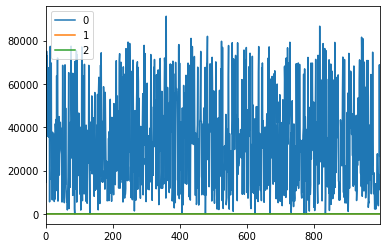

In [269]:
df.plot()

In [279]:
data = df[[0,1]].values
data

array([[4.0920000e+04, 8.3269760e+00],
       [1.4488000e+04, 7.1534690e+00],
       [2.6052000e+04, 1.4418710e+00],
       ...,
       [2.6575000e+04, 1.0650102e+01],
       [4.8111000e+04, 9.1345280e+00],
       [4.3757000e+04, 7.8826010e+00]])

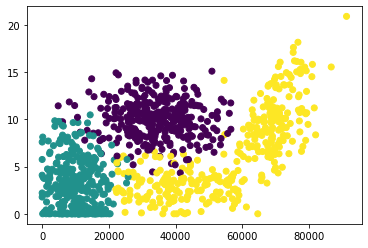

In [280]:
plt.scatter(data[:,0],data[:,1],c=target)

In [281]:
knn = KNeighborsClassifier()
knn.fit(data, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [283]:
knn.score(data,target)  # 训练

0.857

In [287]:
# 在特征的最小到最大范围中选取预测数据
xmin,xmax = data[:,0].min(),data[:,0].max()
ymin,ymax = data[:,1].min(),data[:,1].max()

# 生成平面上的点来做预测数据.
x = np.linspace(xmin,xmax,1000)
y = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(x,y)
X_test = np.c_[X.ravel(),Y.ravel()]  # 生成点(预测数据)
X_test

array([[0.00000000e+00, 0.00000000e+00],
       [9.13643644e+01, 0.00000000e+00],
       [1.82728729e+02, 0.00000000e+00],
       ...,
       [9.10902713e+04, 2.09193490e+01],
       [9.11816356e+04, 2.09193490e+01],
       [9.12730000e+04, 2.09193490e+01]])

In [289]:
y_ = knn.predict(X_test)
y_

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

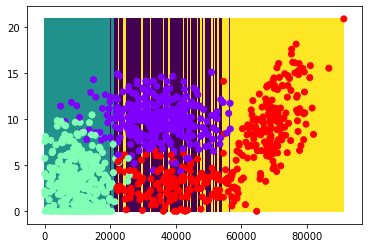

In [291]:
plt.pcolormesh(X,Y,y_.reshape((1000,1000)))
plt.scatter(data[:,0],data[:,1],c=target,cmap='rainbow')